# PhaseNet模型绘图代码简析
## 1.函数解析（源代码自上而下）

* matplotlib.use(‘agg’)：PyCharm 页面中控制绘图显示与否。

In [ ]:
def detect_peaks_thread(i, pred, fname=None, result_dir=None, args=None):

* 定义峰值检测线程

In [ ]:
def plot_result_thread(i, pred, X, Y=None, itp=None, its=None, 
                       itp_pred=None, its_pred=None, fname=None, figure_dir=None):

* 定义结果绘图线程<br>
  * Python dict() 函数 ：用于创建一个字典<br>
    （1）参数：<br>
    class dict(**kwarg)<br>
    class dict(mapping, **kwarg)<br>
    class dict(iterable, **kwarg)<br>
    （2）参数说明：<br>
    **kwargs -- 关键字<br>
    mapping -- 元素的容器。<br>
    iterable -- 可迭代对象。<br>
    举例：<br>
    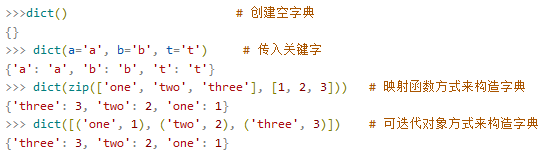


* Python数据可视化——箱线图（box）:
  箱线图是另一种体现数据分布的图形，通过该图可以得知数据的下须值（Q1-1.5IQR）、下四分位数（Q1）、中位数（Q2）、均值、上四分位数（Q3）和上须值（Q3+1.5IQR），更重要的是，箱线图还可以发现数据中的异常点。
  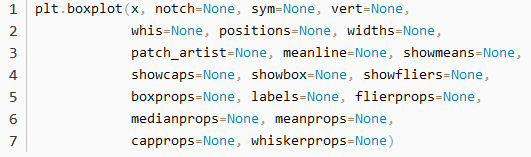
  具体参数意义详见：https://blog.csdn.net/weixin_48615832/article/details/108189486

* figure(画布)大小设置：两种方法：<br>
  （1）在调用plt.figure()显示创建figure对象时，通过figsize参数指定，单位为英寸。<br>
  （2）在创建figure对象后，可以通过figure对象的set_size_inches方法设置。<br>
  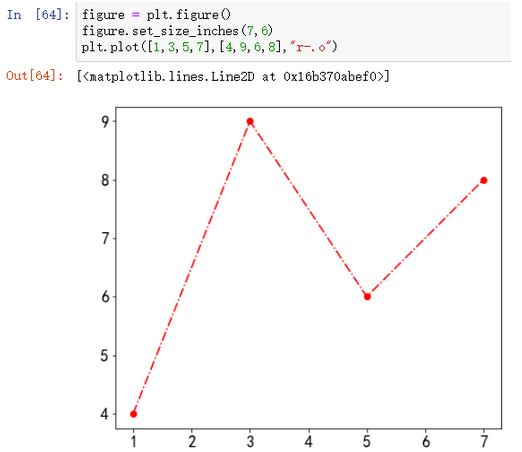
  转载：https://blog.csdn.net/zhuxiao5/article/details/104529032/

* plt.autoscale()，该方法会计算坐标轴的最佳大小以适应数据的显示.<br>
转载：https://blog.csdn.net/u011378809/article/details/78323562

* python画图时给图中的点加标签之plt.text:<br>
  plt.text(x, y, s, fontsize, verticalalignment,horizontalalignment,rotation , **kwargs)
  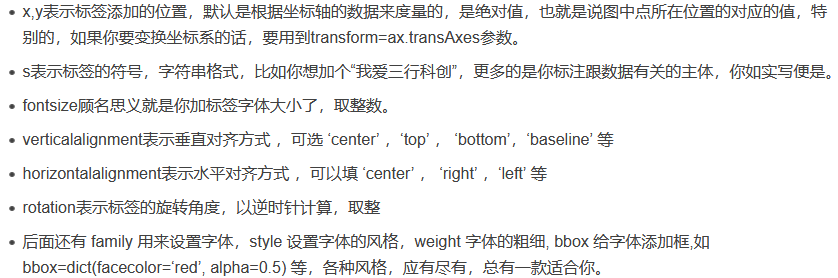
  转载：https://blog.csdn.net/zengbowengood/article/details/104324293

* plt.lengend()：用于给图像加图例。
  常用的几个参数：
  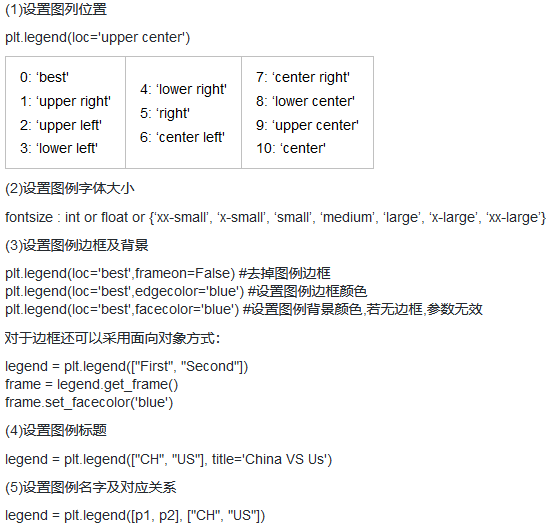
 转载：https://www.cnblogs.com/lfri/p/12248629.html

* plt.tight_layout()：会自动调整子图参数，使之填充整个图像区域。这是个实验特性，可能在一些情况下不工作。它仅仅检查坐标轴标签、刻度标签以及标题的部分。<br>
转载：https://blog.csdn.net/du_shuang/article/details/84139716

* python 中 matplotlib 使用详解
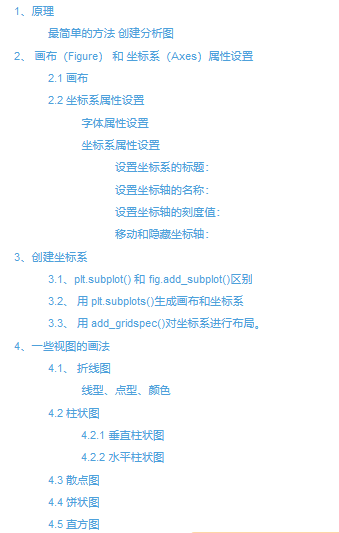
转载：https://blog.csdn.net/weixin_42146296/article/details/104384299

In [ ]:
def postprocessing_thread(i, pred, X, Y=None, itp=None, its=None, fname=None, result_dir=None, figure_dir=None, args=None):

* 定义预处理线程？？？

In [ ]:
def clean_queue(picks):
....
def clean_queue_thread(picks):
.....

* 定义清理队列;
* 定义清理队列线程；

In [ ]:
def metrics(TP, nP, nT):

* 定义矩阵：<br>
  TP：真阳性<br>
  nP:阳性检测数<br>
  nT：真检测数<br>
  * 求取：精确度、查全率、F1

In [ ]:
def correct_picks(picks, true_p, true_s, tol):

* 定义修正检测值

In [ ]:
def calculate_metrics(picks, itp, its, tol=0.1):

* 定义计算矩阵，打印日志。

# Question:        

1.下面这段代码是对P、B波峰值检测的参数设置以及对检测后概率结果的分配。那么具体参数值应当如何理解呢？

In [ ]:
def detect_peaks_thread(i, pred, fname=None, result_dir=None, args=None):
  if args is None:
    itp = detect_peaks(pred[i,:,0,1], mph=0.5, mpd=0.5/Config().dt, show=False)
    its = detect_peaks(pred[i,:,0,2], mph=0.5, mpd=0.5/Config().dt, show=False)
  else:
    itp = detect_peaks(pred[i,:,0,1], mph=args.tp_prob, mpd=0.5/Config().dt, show=False)
    its = detect_peaks(pred[i,:,0,2], mph=args.ts_prob, mpd=0.5/Config().dt, show=False)
  prob_p = pred[i,itp,0,1]
  prob_s = pred[i,its,0,2]

2.在绘图中前三部分绘制三分量地震信号-E N Z,那么第四部分的内容是什么?且弄清楚图的详细表述！

In [ ]:
plt.subplot(411)
  plt.plot(t, X[i, :, 0, 0], 'k', label='E', linewidth=0.5) 
.....
plt.subplot(412)
  plt.plot(t, X[i, :, 0, 1], 'k', label='N', linewidth=0.5)
.....
plt.subplot(413)
  plt.plot(t, X[i, :, 0, 2], 'k', label='Z', linewidth=0.5)
.....

3.在这段代码中，以下是什么意思？？

In [ ]:
def correct_picks(picks, true_p, true_s, tol):
....
tmp_p = np.array(picks[i][0][0]) - np.array(true_p[i])[:,np.newaxis]
    tmp_s = np.array(picks[i][1][0]) - np.array(true_s[i])[:,np.newaxis]
    TP_p += np.sum(np.abs(tmp_p) < tol/dt)
    TP_s += np.sum(np.abs(tmp_s) < tol/dt)
    diff_p.append(tmp_p[np.abs(tmp_p) < 0.5/dt])
    diff_s.append(tmp_s[np.abs(tmp_s) < 0.5/dt])
